# The Scalar 1-Loop, 3-Point Vertex Function at Finite Temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import expand, I, im, symbols, re

import correlator as corr

In [2]:
eps = symbols('eps')

In [38]:
masses = 1, 2, 3
beta = 3

In [41]:
qq_grid = np.arange(-2, 3)

In [63]:
n_max = 4
n_grid = np.arange(-n_max, n_max + 1)

In [42]:
finite_temp_data_Pi =\
    np.array([[corr.finite_temp_term(*corr.p1_p2(qq),*masses, beta, n) for n in n_grid] for qq in qq_grid])

In [43]:
rows = finite_temp_data_Pi.shape[0]
cols = finite_temp_data_Pi.shape[1]
finite_temp_data_Gamma = np.zeros(rows * cols, dtype="complex").reshape(rows, cols)
finite_temp_data_re_Gamma = np.zeros(rows * cols).reshape(rows, cols)
finite_temp_data_im_Gamma = np.zeros(rows * cols).reshape(rows, cols)
for r in range(rows):
    for c in range(cols):
        finite_temp_data_Gamma[r, c] = expand(I * finite_temp_data_Pi[r, c].subs("eps", 0))
        finite_temp_data_re_Gamma[r, c] = re(finite_temp_data_Gamma[r, c])
        finite_temp_data_im_Gamma[r, c] = im(finite_temp_data_Gamma[r, c])
# print(finite_temp_data_re_Gamma)
# print(finite_temp_data_im_Gamma)


## Sequence Plots

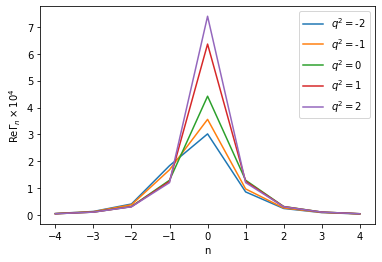

In [59]:
fig, ax = plt.subplots()
for r in range(len(qq_grid)):
    ax.plot(n_grid, 1e4 * finite_temp_data_re_Gamma[r, :], label=r"$q^2=$" + str(qq_grid[r]))
ax.set_xlabel("n")
ax.set_ylabel(r"$\mathrm{Re}\Gamma_n \times 10^4$")
ax.legend(loc="upper right")

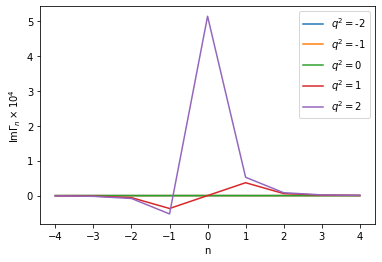

In [60]:
fig, ax = plt.subplots()
for r in range(len(qq_grid)):
    ax.plot(n_grid, 1e4 * finite_temp_data_im_Gamma[r, :], label=r"$q^2=$" + str(qq_grid[r]))
ax.set_xlabel("n")
ax.set_ylabel(r"$\mathrm{Im}\Gamma_n \times 10^4$")
ax.legend(loc="upper right")

## Partial Sums Plots

In [79]:
partial_sums_Gamma = np.zeros(len(qq_grid) * (n_max + 1), dtype="complex").reshape(len(qq_grid), n_max + 1)
partial_sums_re_Gamma = np.zeros(partial_sums_Gamma.size).reshape(partial_sums_Gamma.shape)
partial_sums_im_Gamma = np.zeros(partial_sums_Gamma.size).reshape(partial_sums_Gamma.shape)
partial_sums_Gamma[:, 0] = finite_temp_data_Gamma[:, n_max]
partial_sums_re_Gamma[:, 0] = np.array([re(x) for x in partial_sums_Gamma[:, 0]])
partial_sums_im_Gamma[:, 0] = np.array([im(x) for x in partial_sums_Gamma[:, 0]])
for c in range(1, partial_sums_Gamma.shape[1]):
    partial_sums_Gamma[:, c] = partial_sums_Gamma[:, c - 1] + finite_temp_data_Gamma[:, n_max - c] + finite_temp_data_Gamma[:, n_max + c]
    partial_sums_re_Gamma[:, c] = np.array([re(x) for x in partial_sums_Gamma[:, c]])
    partial_sums_im_Gamma[:, c] = np.array([im(x) for x in partial_sums_Gamma[:, c]])
# print(partial_sums_re_Gamma)
# print(partial_sums_im_Gamma)

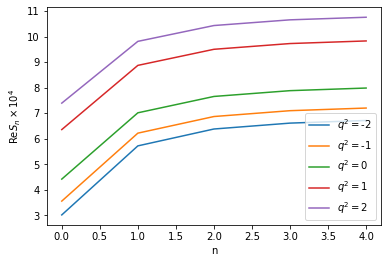

In [81]:
fig, ax = plt.subplots()
for r in range(len(qq_grid)):
    ax.plot(n_grid[n_max:], 1e4 * partial_sums_re_Gamma[r, :], label=r"$q^2=$" + str(qq_grid[r]))
ax.set_xlabel("n")
ax.set_ylabel(r"$\mathrm{Re}S_n \times 10^4$")
ax.legend(loc="lower right")

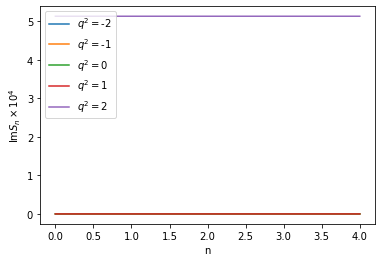

In [83]:
fig, ax = plt.subplots()
for r in range(len(qq_grid)):
    ax.plot(n_grid[n_max:], 1e4 * partial_sums_im_Gamma[r, :], label=r"$q^2=$" + str(qq_grid[r]))
ax.set_xlabel("n")
ax.set_ylabel(r"$\mathrm{Im}S_n \times 10^4$")
ax.legend(loc="upper left")

## The Vertex Function

Text(0, 0.5, '$\\mathrm{Re}\\Gamma\\times 10^4$')

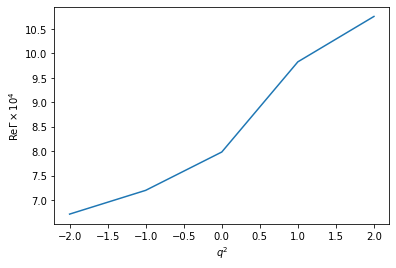

In [89]:
fig, ax = plt.subplots()
ax.plot(qq_grid, 1e4 * partial_sums_re_Gamma[:, -1])
ax.set_xlabel(r"$q^2$")
ax.set_ylabel(r"$\mathrm{Re}\Gamma\times 10^4$")

Text(0, 0.5, '$\\mathrm{Im}\\Gamma\\times 10^4$')

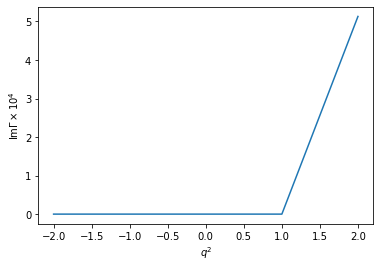

In [88]:
fig, ax = plt.subplots()
ax.plot(qq_grid, 1e4 * partial_sums_im_Gamma[:, -1])
ax.set_xlabel(r"$q^2$")
ax.set_ylabel(r"$\mathrm{Im}\Gamma\times 10^4$")